In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data3.csv', index_col=[0])
# df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data3-outliers-trimmed.csv', index_col=[0])
# df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data3-outliers-capped.csv', index_col=[0])

In [23]:
features = df.drop(columns=['name', 'pr_points1', 'pr_points2', 'pr_points3'], axis=1)
target = df[['pr_points1', 'pr_points2', 'pr_points3']]

In [24]:
numeric_features = features.drop(columns=['language'], axis=1)
categorical_features = features[['language']].copy()
numeric_features.head()

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3
Unnamed: 0,,,,,,,
0,40.0,24091.0,28.0,564,2.020,1.985,1.902
0,69.0,1188.0,23.0,478,3.172,2.960,2.070
0,96.0,24595.0,60.0,1955,4.279,3.977,3.149
0,10.0,149.0,11.0,1248,2.217,2.098,1.655
0,25.0,9554.0,34.0,1284,1.928,1.850,1.617


In [25]:
scaler = StandardScaler()
standardized_features = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)
standardized_features.describe()

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3
count,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03
mean,-4.231520e-17,-2.821013e-17,-2.821013e-17,7.405160e-17,1.974709e-16,7.052533e-17,1.128405e-16
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00
min,-4.951627e-01,-3.879912e-01,-8.587740e-01,-1.886333e+00,-1.517713e+00,-1.555091e+00,-1.762362e+00
25%,-4.555120e-01,-3.684203e-01,-6.972085e-01,-7.559162e-01,-7.297365e-01,-7.280464e-01,-7.456980e-01
50%,-3.592173e-01,-3.114534e-01,-4.279327e-01,-8.263695e-02,-3.102570e-01,-3.057950e-01,-2.879373e-01
75%,-6.891721e-02,-1.340663e-01,2.991120e-01,6.794069e-01,3.804410e-01,3.854386e-01,4.685666e-01
max,5.374881e+00,6.256886e+00,3.026889e+00,3.137742e+00,3.269410e+00,3.267271e+00,3.222876e+00


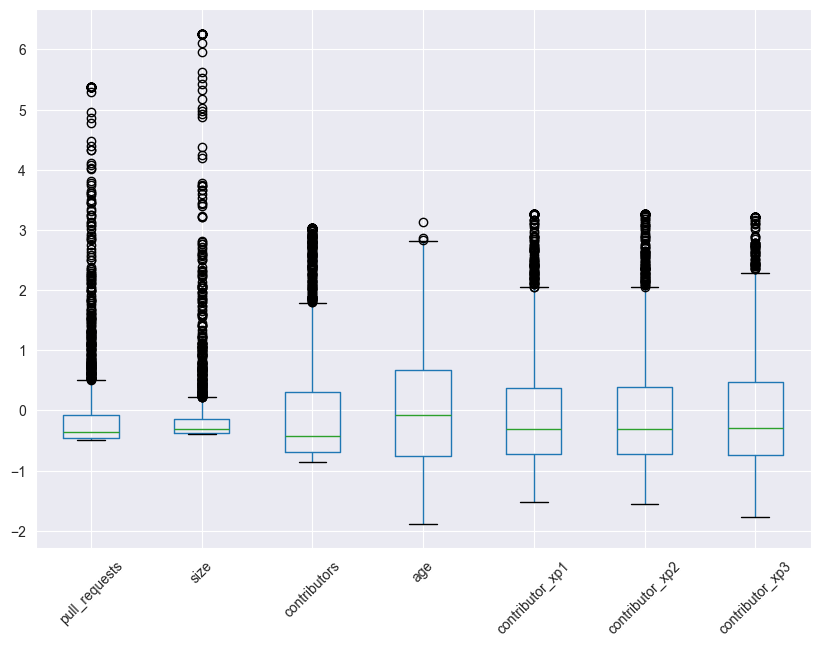

In [26]:
standardized_features.boxplot(figsize=(10,7), rot=45)
plt.show()

In [27]:
categorical_features = pd.get_dummies(categorical_features, columns=['language'], dtype=int)
categorical_features.head()

,language_C++,language_Go,language_Java,language_JavaScript,language_Python,language_Swift,language_TypeScript
Unnamed: 0,,,,,,,
0,0,0,1,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,1,0,0,0,0


In [28]:
processed_data = pd.concat([standardized_features, categorical_features, target], axis=1, sort=False)
processed_data.head()

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,language_C++,language_Go,language_Java,language_JavaScript,language_Python,language_Swift,language_TypeScript,pr_points1,pr_points2,pr_points3
Unnamed: 0,,,,,,,,,,,,,,,,,
0,-0.441351,-0.155899,-0.607450,-1.390139,-0.760476,-0.749159,-0.714005,0,0,1,0,0,0,0,2.271,2.389,2.377
0,-0.400284,-0.376812,-0.652329,-1.466477,-0.328626,-0.353298,-0.621405,0,0,1,0,0,0,0,3.390,3.318,2.749
0,-0.362050,-0.151038,-0.320222,-0.155424,0.086355,0.059615,-0.026675,0,0,1,0,0,0,0,4.006,3.668,3.544
0,-0.483834,-0.386834,-0.760040,-0.782989,-0.686626,-0.703280,-0.850148,0,0,1,0,0,0,0,3.281,2.569,3.257
0,-0.462592,-0.296117,-0.553595,-0.751034,-0.794964,-0.803970,-0.871093,0,0,1,0,0,0,0,4.867,4.833,5.186


In [29]:
processed_data.to_csv('/Users/yelderiny/Projects/Dissertation/Data/processed-data3.csv', index=False)
# processed_data.to_csv('/Users/yelderiny/Projects/Dissertation/Data/processed-data3-outliers-trimmed.csv', index=False)
# processed_data.to_csv('/Users/yelderiny/Projects/Dissertation/Data/processed-data3-outliers-capped.csv', index=False)